In [2]:
## import necessary libraries
import numpy as np 
import pandas as pd 

## for visualization 
import matplotlib.pyplot as plt 
import seaborn as sns

## to import vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

## to import train test split
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

## to import linear regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso

##  to import hypothesis testing
from scipy.stats import shapiro,kstest,normaltest

## to import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

## Decision tree 
from sklearn.tree import DecisionTreeRegressor

## import Randomfroest, adaboost, Gradientboost regreesion 
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

## Removes All The Warnings Present
import warnings
warnings.filterwarnings("ignore")   

C:\Users\Asus\AppData\Local\Temp\ipykernel_15856\4263668206.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## 2. Problem Statement

Calories Burnt Prediction using Machine Learning
Here target column is :Calories


## 3. Data Gathering 

In [109]:
df= pd.read_csv(r"D:\Machine learning\Excel Dataset\Calories ML Project Data.csv")
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193,86,11,92,40.4,45
14996,17212577,female,27,165,65,6,85,39.2,23
14997,17271188,female,43,159,58,16,90,40.1,75
14998,18643037,male,78,193,97,2,84,38.3,11


## 4. EDA(Explorative Data Analysis)

In [110]:
df.shape 

(15000, 9)

In [111]:
## get information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.0+ MB


In [112]:
## get stastical information
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [113]:
df.drop("User_ID",axis=1,inplace=True)

In [114]:
df.isna().sum()

Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

#### Data Visualization

<Axes: xlabel='Age', ylabel='Density'>

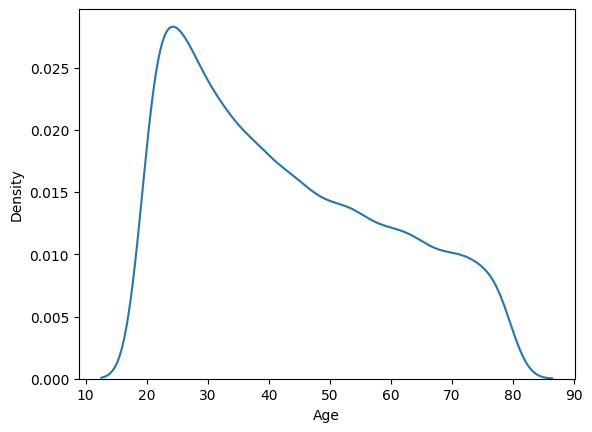

In [115]:
sns.kdeplot(df["Age"])

<Axes: xlabel='Height', ylabel='Count'>

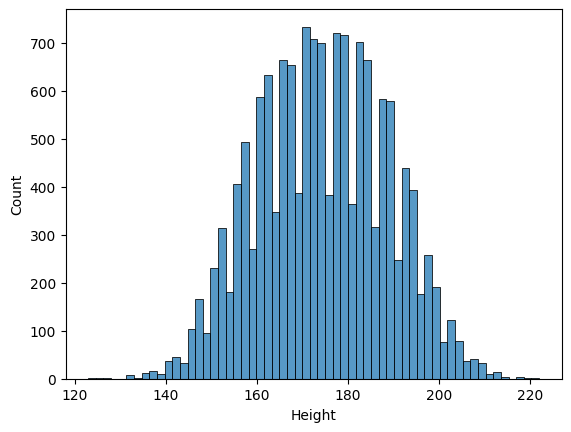

In [116]:
sns.histplot(df["Height"])

<Axes: xlabel='Weight', ylabel='Density'>

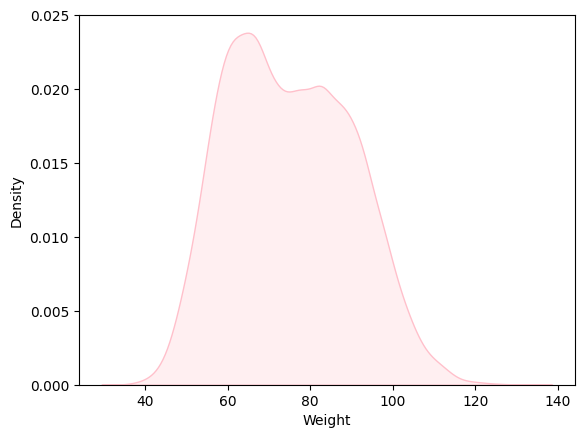

In [117]:
sns.kdeplot(df["Weight"], fill=True, color="Pink")

<Axes: xlabel='Duration', ylabel='Count'>

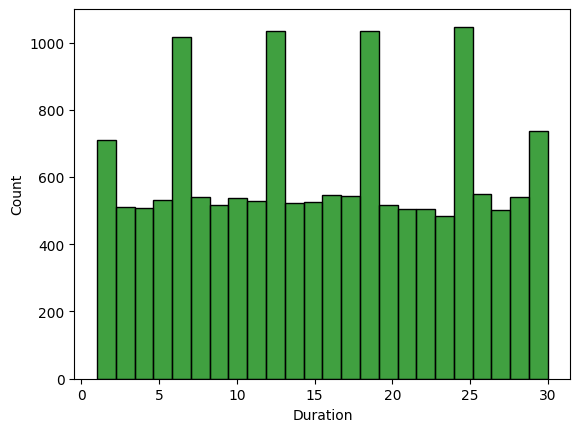

In [118]:
sns.histplot(df["Duration"],color="Green")

<Axes: xlabel='Heart_Rate', ylabel='Density'>

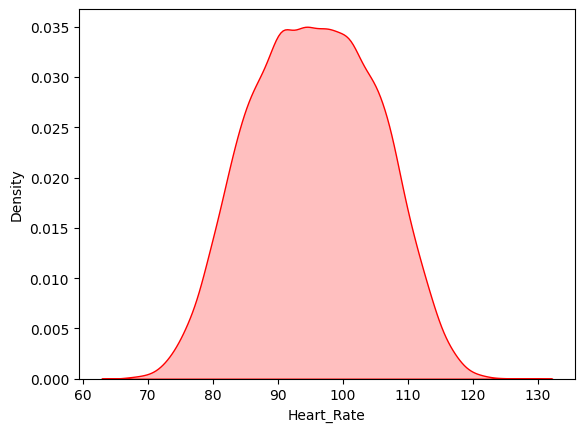

In [119]:
sns.kdeplot(df["Heart_Rate"],fill=True,color= "red")

<Axes: xlabel='Body_Temp', ylabel='Count'>

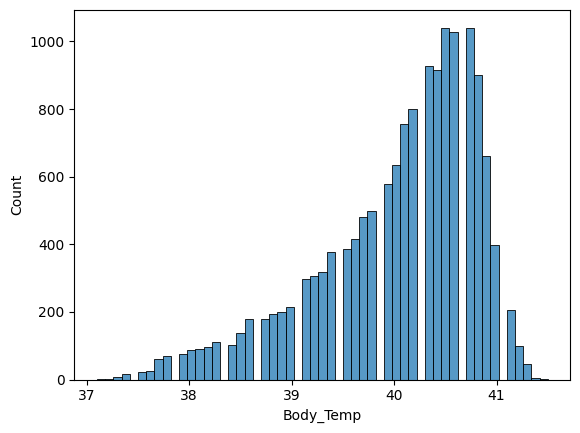

In [120]:
sns.histplot(df["Body_Temp"])

In [121]:
df["Gender"].value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

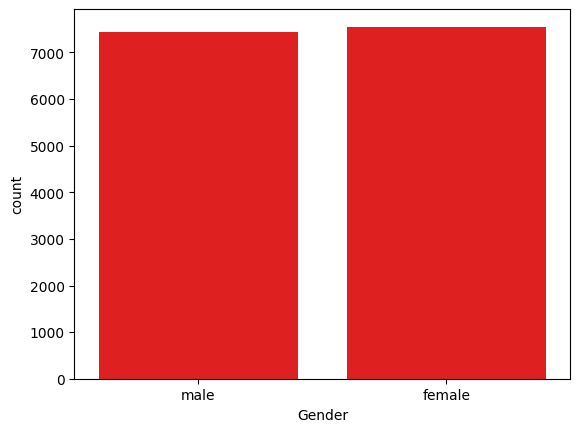

In [122]:
sns.countplot(x=df["Gender"],color="Red")

In [123]:
df["Calories"].value_counts

<bound method IndexOpsMixin.value_counts of 0        231
1         66
2         26
3         71
4         35
        ... 
14995     45
14996     23
14997     75
14998     11
14999     98
Name: Calories, Length: 15000, dtype: int64>

In [124]:
## sns.pairplot(df)

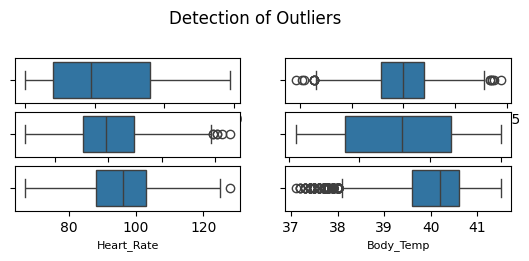

<Figure size 640x480 with 0 Axes>

In [125]:
## checking outliers[Befor]

plt.figure(figure=(20,20))
plt.suptitle("Detection of Outliers")
pltn= 1
column_exclude= ['Gender','Calories']

for i in df.columns:
    if i not in column_exclude and pltn <=6:
        plt.subplot(7,2,pltn)
        sns.boxplot(df[i],orient="h")
        plt.xlabel(i, fontsize= 8)
        pltn +=1
plt.show()
plt.tight_layout()

## 5. Feature engineering

In [21]:
## converting data into numerical format
df["Gender"].replace({"male":0,"female":1},inplace=True)
df

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,68,190,94,29,105,40.8,231
1,1,20,166,60,14,94,40.3,66
2,0,69,179,79,5,88,38.7,26
3,1,34,179,71,13,100,40.5,71
4,1,27,154,58,10,81,39.8,35
...,...,...,...,...,...,...,...,...
14995,1,20,193,86,11,92,40.4,45
14996,1,27,165,65,6,85,39.2,23
14997,1,43,159,58,16,90,40.1,75
14998,0,78,193,97,2,84,38.3,11


In [98]:
## handling outliers 
def find_outliers(o):
    
    q1 = df[o].quantile(0.25)
    q2 = df[o].quantile(0.50)
    q3 = df[o].quantile(0.75)

    iqr = q3-q1

    lower_tail = q1 - 1.5*iqr
    upper_tail = q3 + 1.5*iqr
    print(f"Lower tail:{lower_tail}")
    print(f"Upper tail:{upper_tail}")
    outliers= df[(df[o]<lower_tail)|(df[o]>upper_tail)]
    df[o]= np.where(df[o]<lower_tail,lower_tail,np.where (df[o]>upper_tail,upper_tail,df[o]))
    return df

In [99]:
find_outliers("Height")

Lower tail:132.5
Upper tail:216.5


,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,68,190.0,94.0,29,105.0,40.8,231
1,1,20,166.0,60.0,14,94.0,40.3,66
2,0,69,179.0,79.0,5,88.0,38.7,26
3,1,34,179.0,71.0,13,100.0,40.5,71
4,1,27,154.0,58.0,10,81.0,39.8,35
...,...,...,...,...,...,...,...,...
14995,1,20,193.0,86.0,11,92.0,40.4,45
14996,1,27,165.0,65.0,6,85.0,39.2,23
14997,1,43,159.0,58.0,16,90.0,40.1,75
14998,0,78,193.0,97.0,2,84.0,38.3,11


In [101]:
find_outliers("Weight")

Lower tail:27.0
Upper tail:123.0


,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,68,190.0,94.0,29,105.0,40.8,231
1,1,20,166.0,60.0,14,94.0,40.3,66
2,0,69,179.0,79.0,5,88.0,38.7,26
3,1,34,179.0,71.0,13,100.0,40.5,71
4,1,27,154.0,58.0,10,81.0,39.8,35
...,...,...,...,...,...,...,...,...
14995,1,20,193.0,86.0,11,92.0,40.4,45
14996,1,27,165.0,65.0,6,85.0,39.2,23
14997,1,43,159.0,58.0,16,90.0,40.1,75
14998,0,78,193.0,97.0,2,84.0,38.3,11


In [103]:
find_outliers("Heart_Rate")

Lower tail:65.5
Upper tail:125.5


,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,68,190.0,94.0,29,105.0,40.8,231
1,1,20,166.0,60.0,14,94.0,40.3,66
2,0,69,179.0,79.0,5,88.0,38.7,26
3,1,34,179.0,71.0,13,100.0,40.5,71
4,1,27,154.0,58.0,10,81.0,39.8,35
...,...,...,...,...,...,...,...,...
14995,1,20,193.0,86.0,11,92.0,40.4,45
14996,1,27,165.0,65.0,6,85.0,39.2,23
14997,1,43,159.0,58.0,16,90.0,40.1,75
14998,0,78,193.0,97.0,2,84.0,38.3,11


In [105]:
find_outliers("Body_Temp")

Lower tail:38.1
Upper tail:42.1


,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,68,190.0,94.0,29,105.0,40.8,231
1,1,20,166.0,60.0,14,94.0,40.3,66
2,0,69,179.0,79.0,5,88.0,38.7,26
3,1,34,179.0,71.0,13,100.0,40.5,71
4,1,27,154.0,58.0,10,81.0,39.8,35
...,...,...,...,...,...,...,...,...
14995,1,20,193.0,86.0,11,92.0,40.4,45
14996,1,27,165.0,65.0,6,85.0,39.2,23
14997,1,43,159.0,58.0,16,90.0,40.1,75
14998,0,78,193.0,97.0,2,84.0,38.3,11


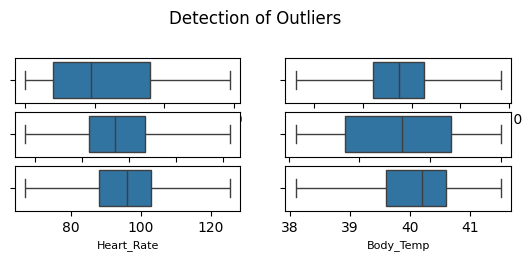

<Figure size 640x480 with 0 Axes>

In [107]:
## Checking outliers [after]

plt.figure(figure=(20,20))
plt.suptitle("Detection of Outliers")
pltn= 1
column_exclude= ['Gender','Calories']

for i in df.columns:
    if i not in column_exclude and pltn <=6:
        plt.subplot(7,2,pltn)
        sns.boxplot(df[i],orient="h")
        plt.xlabel(i, fontsize= 8)
        pltn +=1
plt.show()
plt.tight_layout()

## 6. Feature Selection

### Assumption 1: Linearity

In [31]:
df.corr()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
Gender,1.000000,-0.003222,-0.710743,-0.783347,-0.003440,-0.011538,-0.007236,-0.022357
Age,-0.003222,1.000000,0.009654,0.090159,0.013247,0.010493,0.012204,0.154395
Height,-0.710743,0.009654,1.000000,0.958534,-0.004549,0.000606,0.001613,0.017635
Weight,-0.783347,0.090159,0.958534,1.000000,-0.001792,0.004357,0.004308,0.035568
Duration,-0.003440,0.013247,-0.004549,-0.001792,1.000000,0.852887,0.911465,0.955421
Heart_Rate,-0.011538,0.010493,0.000606,0.004357,0.852887,1.000000,0.778540,0.897877
Body_Temp,-0.007236,0.012204,0.001613,0.004308,0.911465,0.778540,1.000000,0.834175
Calories,-0.022357,0.154395,0.017635,0.035568,0.955421,0.897877,0.834175,1.000000


<Axes: >

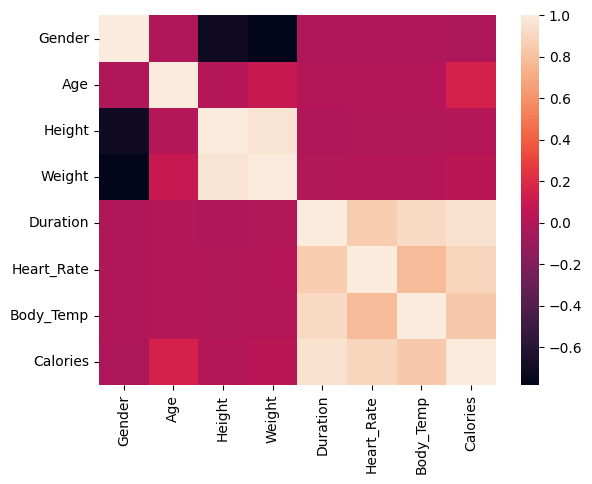

In [32]:
sns.heatmap(df.corr())

<Axes: >

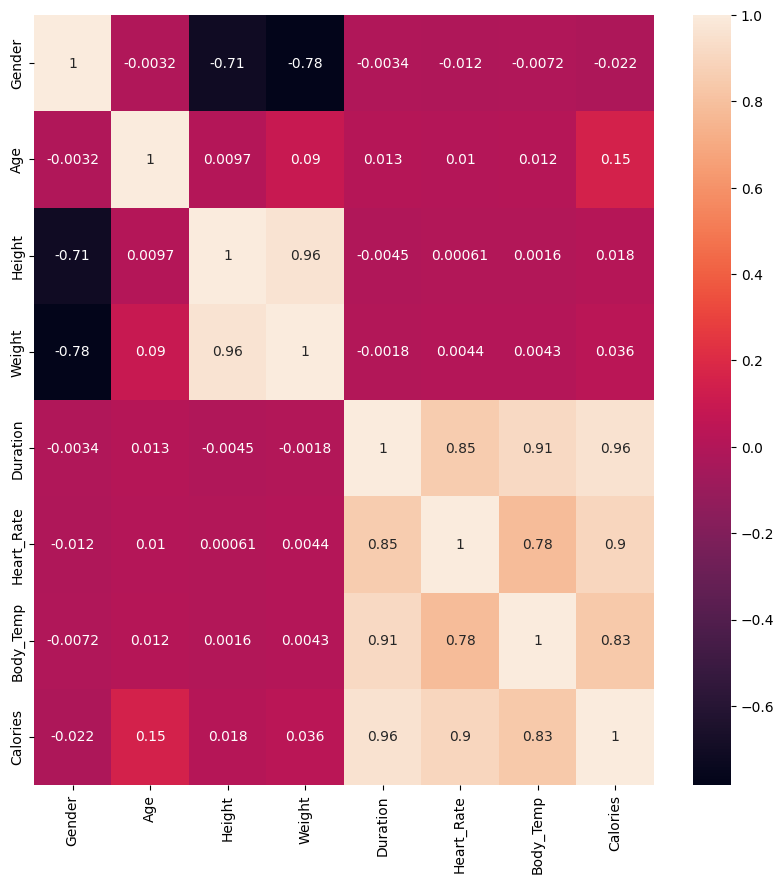

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

<Axes: >

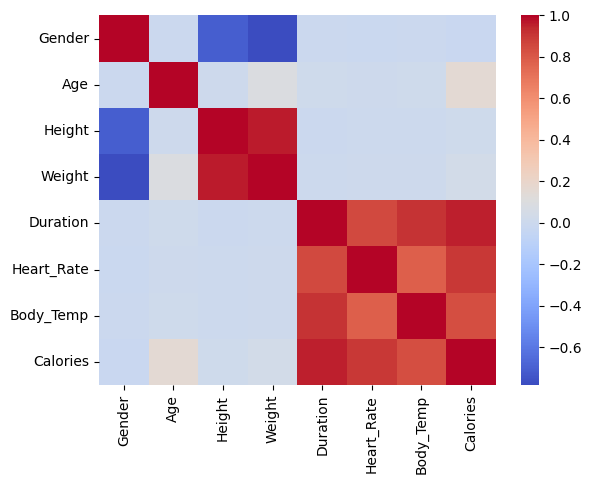

In [34]:
sns.heatmap(df.corr(),cmap="coolwarm")

### Assumption 2:No Multicolinearity

In [35]:
## varience inflation factor 
vif_df= pd.DataFrame()
df1= df.iloc[:,:7]
vif_df["Columns"]= df1.columns
vif_df

,Columns
0,Gender
1,Age
2,Height
3,Weight
4,Duration
5,Heart_Rate
6,Body_Temp


In [36]:
a=[]
for i in range(df1.shape[1]):
    vif = variance_inflation_factor(df1.to_numpy(),i)
    a.append(vif)

In [37]:
a

[5.6831833245815595,
 8.224366741500466,
 2064.9510004656113,
 469.6612761944257,
 14.059941390551371,
 362.88657500416906,
 1071.5892240075093]

In [38]:
vif_df["VIF"]=a

In [39]:
vif_df

,Columns,VIF
0,Gender,5.683183
1,Age,8.224367
2,Height,2064.951000
3,Weight,469.661276
4,Duration,14.059941
5,Heart_Rate,362.886575
6,Body_Temp,1071.589224


### Train- Test split

In [40]:
x= df1  ## independent columns 
y= df["Calories"] ## dependent feature(Target column)


In [41]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2)

In [42]:
xtrain.shape

(12000, 7)

In [43]:
xtest.shape

(3000, 7)

In [44]:
ytrain.shape

(12000,)

In [45]:
ytest.shape

(3000,)

## 7. Model Training

In [46]:
linear_regr= LinearRegression()
linear_regr_model= linear_regr.fit(xtrain,ytrain)
linear_regr_model

LinearRegression()

In [47]:
ytrain_predicted= linear_regr_model.predict(xtrain)
ytrain_predicted

array([166.68205101, 201.7153691 ,  73.06899155, ..., 124.28456825,
        39.03846356, 113.56221527])

In [48]:
ytrain.head()

1560     167
10605    226
4300      70
2852      16
14155     57
Name: Calories, dtype: int64

In [49]:
error= ytrain-ytrain_predicted ## residual
error

1560      0.317949
10605    24.284631
4300     -3.068992
2852      0.311538
14155    -7.212650
           ...    
1370      3.529177
13981    -5.240192
2497    -20.284568
2448    -16.038464
3552     -1.562215
Name: Calories, Length: 12000, dtype: float64

### Assumption 3: Normality of residual 

#### residual should be normally distributed 
to check : Visualiztion: use kdeplot/ histogram plot
also we can use : Hypothesis testing : 1. Shapiro, 2.Normal, 3. Kstest

<Axes: xlabel='Calories', ylabel='Density'>

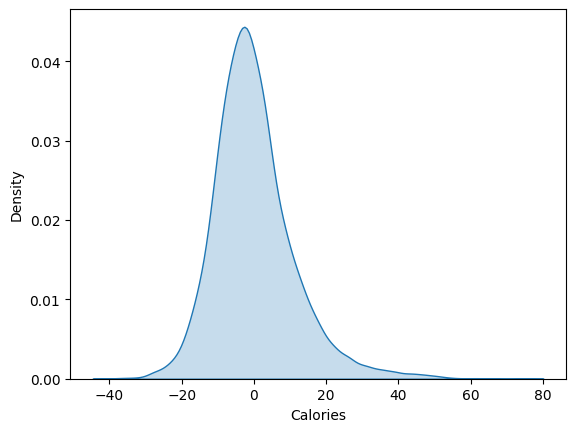

In [50]:
## kdeplot
sns.kdeplot(error, fill=True)

### Hypothesis Testing : by shapiro 

In [51]:
statstic, p_value= shapiro(error)
print(statstic)
print(p_value)

if p_value<=0.05:
    print("error is normally distributed")
    print("Null Hypothysis H0 is true")

else:
    print("error is not normally distributed")
    print("Alternative Hypothesis H1 is true")


0.9482292045418664
1.6181130948435028e-53
error is normally distributed
Null Hypothysis H0 is true


### Assumption 4: Homoscadasticity

<Axes: xlabel='Calories', ylabel='Calories'>

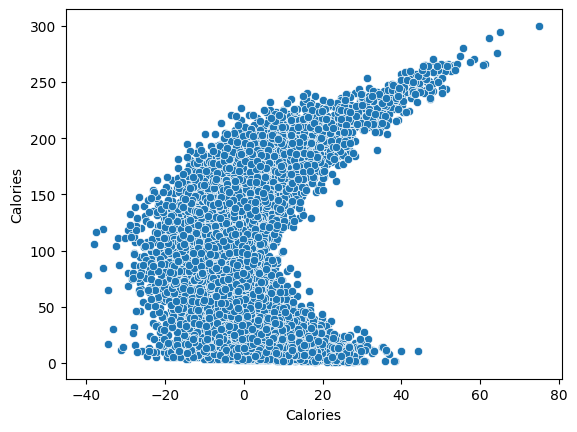

In [52]:
## checked by scatter plot
sns.scatterplot(x=error,y=df["Calories"])

## 8 Model Evaluation 

### On training data

In [53]:
MSE= mean_squared_error(ytrain,ytrain_predicted)
print(f"Mean Squ Error:{MSE}")
print("-"*40)

MAE= mean_absolute_error(ytrain,ytrain_predicted)
print(f"Mean Abs Error:{MAE}")
print("-"*40)

RMSE = np.sqrt(MSE)
print(f"Root Mean Squ Error:{RMSE}")
print("-"*40)

r2= r2_score(ytrain,ytrain_predicted)
print(f"r2 Score:{r2}")
print("-"*40)


Mean Squ Error:127.27206029809487
----------------------------------------
Mean Abs Error:8.34542888087099
----------------------------------------
Root Mean Squ Error:11.281491935825459
----------------------------------------
r2 Score:0.9674498768638198
----------------------------------------


Model evauation for testing data 

In [54]:
ytest

9532      56
4907     153
8973      32
162       69
7821       3
        ... 
10351     62
7701     148
12975    168
7682     144
7309     162
Name: Calories, Length: 3000, dtype: int64

In [55]:
ytest_predict= linear_regr_model.predict(xtest)
ytest_predict

array([ 59.20679148, 168.89034211,  39.12212726, ..., 170.79054884,
       154.92030844, 166.42792049])

In [56]:
MSE= mean_squared_error(ytest,ytest_predict)
print(f"Mean Squ Error:{MSE}")
print("-"*40)

MAE= mean_absolute_error(ytest,ytest_predict)
print(f"Mean Abs Error:{MAE}")
print("-"*40)

RMSE = np.sqrt(MSE)
print(f"Root Mean Squ Error:{RMSE}")
print("-"*40)

r2= r2_score(ytest,ytest_predict)
print(f"r2 Score:{r2}")
print("-"*40)

Mean Squ Error:132.91554302851154
----------------------------------------
Mean Abs Error:8.489806251983765
----------------------------------------
Root Mean Squ Error:11.52890033908315
----------------------------------------
r2 Score:0.9655908912761489
----------------------------------------


## Algo 2. Decision tree 

## Model Training

In [63]:
dt_regg=DecisionTreeRegressor()
dt_regg_model=dt_regg.fit(xtrain,ytrain)
dt_regg_model

DecisionTreeRegressor()

## Model Evaluation 

In [64]:
ytrain_predicted= dt_regg_model.predict(xtrain)

In [65]:
## for training data 
def Train(L):
    MSE= mean_squared_error(ytrain,ytrain_predicted)
    print(f"Mean Squ Error:{MSE}")
    print("-"*40)

    MAE= mean_absolute_error(ytrain,ytrain_predicted)
    print(f"Mean Abs Error:{MAE}")
    print("-"*40)

    RMSE = np.sqrt(MSE)
    print(f"Root Mean Squ Error:{RMSE}")
    print("-"*40)

    r2= r2_score(ytrain,ytrain_predicted)
    print(f"r2 Score:{r2}")
    print("-"*40)
    

In [66]:
Train(ytrain_predicted)

Mean Squ Error:0.0
----------------------------------------
Mean Abs Error:0.0
----------------------------------------
Root Mean Squ Error:0.0
----------------------------------------
r2 Score:1.0
----------------------------------------


In [67]:
## for testing 

ytest_predict= dt_regg_model.predict(xtest)

In [68]:
def Test(R):
    MSE= mean_squared_error(ytest,ytest_predict)
    print(f"Mean Squ Error:{MSE}")
    print("-"*40)

    MAE= mean_absolute_error(ytest,ytest_predict)
    print(f"Mean Abs Error:{MAE}")
    print("-"*40)

    RMSE = np.sqrt(MSE)
    print(f"Root Mean Squ Error:{RMSE}")
    print("-"*40)

    r2= r2_score(ytest,ytest_predict)
    print(f"r2 Score:{r2}")
    print("-"*40)

In [69]:
Test(ytest_predict)

Mean Squ Error:26.852
----------------------------------------
Mean Abs Error:3.2946666666666666
----------------------------------------
Root Mean Squ Error:5.181891546530089
----------------------------------------
r2 Score:0.9930485677867287
----------------------------------------


## Algor 2.1 Decision tree with hyperparameters tunning 

In [70]:
hyperpara={"criterion":["squared_error","absolute_error"],
           "max_depth":np.arange(5,20),
           "min_samples_split": np.arange(5,20),
           "min_samples_leaf": np.arange(5,20)}

In [71]:
random_searchcv= RandomizedSearchCV(dt_regg_model,hyperpara,cv=5)
random_searchcv=random_searchcv.fit(xtrain,ytrain)
random_searchcv

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'min_samples_leaf': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'min_samples_split': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])})

In [72]:
random_searchcv.best_estimator_

DecisionTreeRegressor(max_depth=19, min_samples_leaf=6, min_samples_split=9)

In [73]:
dt_hypo=DecisionTreeRegressor(criterion='absolute_error', max_depth=11,min_samples_leaf=6, min_samples_split=15)
dt_hypo_model=dt_hypo.fit(xtrain,ytrain)
dt_hypo_model

DecisionTreeRegressor(criterion='absolute_error', max_depth=11,
                      min_samples_leaf=6, min_samples_split=15)

## Evaluation 

In [74]:
ytrain_predicted= dt_hypo_model.predict(xtrain)

In [75]:
## for training 
Train(ytrain_predicted)

Mean Squ Error:19.039791666666666
----------------------------------------
Mean Abs Error:2.6355833333333334
----------------------------------------
Root Mean Squ Error:4.36346097343229
----------------------------------------
r2 Score:0.9951305293417452
----------------------------------------


In [76]:
## fpr testing 
ytest_predict=dt_hypo_model.predict(xtest)

In [77]:
Test(ytest_predict)

Mean Squ Error:35.581
----------------------------------------
Mean Abs Error:3.9623333333333335
----------------------------------------
Root Mean Squ Error:5.96498113995342
----------------------------------------
r2 Score:0.9907888086704749
----------------------------------------


## Algorithm 3 : Random forest 

## Model Training 

In [78]:
randm_frst= RandomForestRegressor()
randm_frst_model=randm_frst.fit(xtrain,ytrain)
randm_frst_model

RandomForestRegressor()

In [79]:
## for training data
ytrain_predicted=randm_frst_model.predict(xtrain)

In [80]:
Train(ytrain_predicted)

Mean Squ Error:1.1575389583333333
----------------------------------------
Mean Abs Error:0.6646925000000001
----------------------------------------
Root Mean Squ Error:1.075889844888097
----------------------------------------
r2 Score:0.9997039567400698
----------------------------------------


In [81]:
## for testing data 
ytest_predict=randm_frst_model.predict(xtest)

In [82]:
Train(ytest_predict)

Mean Squ Error:1.1575389583333333
----------------------------------------
Mean Abs Error:0.6646925000000001
----------------------------------------
Root Mean Squ Error:1.075889844888097
----------------------------------------
r2 Score:0.9997039567400698
----------------------------------------


### Save model into Pickle file 

In [83]:
import pickle 

In [84]:
with open("Model.pkl","wb") as f:
    pickle.dump(randm_frst_model,f)

In [85]:
y.head(1)

0    231
Name: Calories, dtype: int64

In [86]:
test_data =df.head(1).iloc[:,:7]
test_data

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,68,190.0,94.0,29,105.0,40.8


### Take input from user 

In [87]:
def Calories_Predi(Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp):
    Data_test=pd.DataFrame({"Gender":[Gender],
                            "Age":[Age],	
                            "Height":[Height],
                            "Weight":[Weight],
                            "Duration":[Duration],
                            "Heart_Rate":[Heart_Rate],
                            "Body_Temp":[Body_Temp]})
    with open ("Model.pkl","rb") as f:
        Model= pickle.load(f)
        
    print(f"Calories predicted: {Model.predict(Data_test)[0]}")


In [88]:
Calories_Predi(0,68,190.0,94.0,29,105.0,40.8)

Calories predicted: 230.21


In [89]:
Calories_Predi(2,45,678,65,34,456,90.7)

Calories predicted: 241.35
